In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random
import requests
from PIL import Image
import cv2

from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

from keras.models import Model

np.random.seed(0)

In [ ]:
# Import MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Checking to see if dataset imported correctly
# Assert checks condition in argument and return message if false
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"


[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

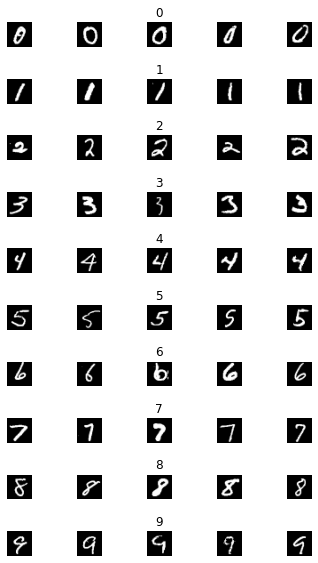

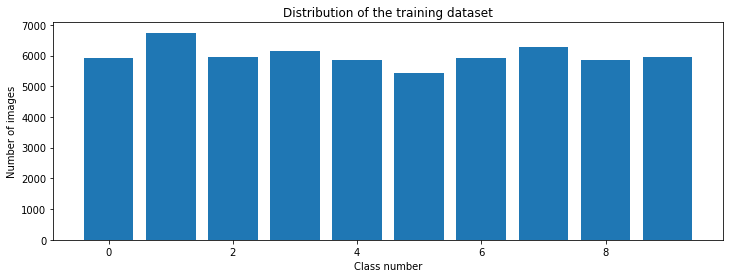

In [ ]:
num_of_samples = []
 
cols = 5
num_classes = 10

# Create visualization of dataset 
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 8))
fig.tight_layout()

for i in range(cols):
    for j in range(num_classes):
        # Gets all data in training data with label of j
        x_selected = X_train[y_train == j]
        # Gets a random element to display
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

# Shows bargraph of training data set
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

In [ ]:
# Reshape to be 28x28 image with depth of 1 instead of flatten into 784 pixel
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

# One hot encoding 
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Normalization. Pixel values are from 0-255. Makes data shown as 0-1 instead
X_train = X_train/255 
X_test = X_test/255

In [ ]:
def leNet_model():
  # create model
  model = Sequential()
  # Add convolution layer with 30 filters of 5x5, each having their own bias value therefore having 30*25+30=780 total parameter
  # After layer, map should be 30 24x24 
  model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
  # Add pool layer with filter of 2x2
  # After layer, map should be 12,12,30
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  # Will have 15 * 30 * 3 * 3 = 4050 parameters
  # Will be 10,10,15 
  model.add(Conv2D(15, (3, 3), activation='relu'))
  # Will be 5,5,15
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  # Flattens our (5,5,15) array into 375
  model.add(Flatten())
  # FC Layer
  model.add(Dense(500, activation='relu'))
  # Dropout randomly selects fraction of nodes to be turned off during training only, prevents overfitting
  model.add(Dropout(0.5))
  # Output
  model.add(Dense(num_classes, activation='softmax'))
  # Compile model
  model.compile(Adam(lr = 0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

model = leNet_model()
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 500)               188000    
_________________________________________________________________
dropout_3 (Dropout)          (None, 500)              

Epoch 1/10
135/135 [==============================] - 3s 15ms/step - loss: 0.5625 - accuracy: 0.8102 - val_loss: 0.0580 - val_accuracy: 0.9813
Epoch 2/10
135/135 [==============================] - 2s 13ms/step - loss: 0.0649 - accuracy: 0.9804 - val_loss: 0.0447 - val_accuracy: 0.9873
Epoch 3/10
135/135 [==============================] - 2s 13ms/step - loss: 0.0525 - accuracy: 0.9835 - val_loss: 0.0414 - val_accuracy: 0.9873
Epoch 4/10
135/135 [==============================] - 2s 13ms/step - loss: 0.0443 - accuracy: 0.9860 - val_loss: 0.0399 - val_accuracy: 0.9897
Epoch 5/10
135/135 [==============================] - 2s 13ms/step - loss: 0.0433 - accuracy: 0.9867 - val_loss: 0.0392 - val_accuracy: 0.9885
Epoch 6/10
135/135 [==============================] - 2s 13ms/step - loss: 0.0412 - accuracy: 0.9866 - val_loss: 0.0394 - val_accuracy: 0.9895
Epoch 7/10
135/135 [==============================] - 2s 13ms/step - loss: 0.0363 - accuracy: 0.9879 - val_loss: 0.0364 - val_accuracy: 0.9905

Text(0.5, 0, 'epoch')

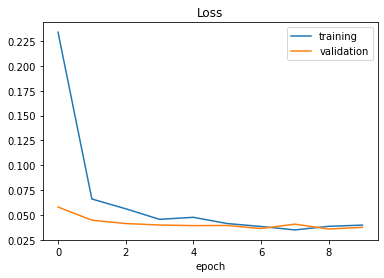

In [ ]:
history=model.fit(X_train, y_train, epochs=10,  validation_split = 0.1, batch_size = 400, verbose = 1, shuffle = 1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

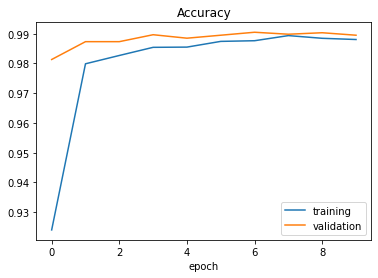

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

Test score: 0.03417224436998367
Test accuracy: 0.9894999861717224
(1, 28, 28, 1)
(1, 28, 28, 1)
predicted digit: [3]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


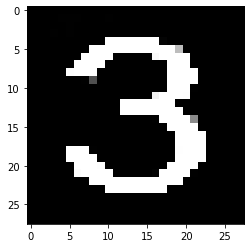

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
 
print('Test score:', score[0])
print('Test accuracy:', score[1])
url = 'https://printables.space/files/uploads/download-and-print/large-printable-numbers/3-a4-1200x1697.jpg'
 
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))
 
img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))
 
img = img/255
img = img.reshape(1,28,28,1)
print(img.shape)
 
print(img.shape)
print("predicted digit: "+str(model.predict_classes(img)))

(1, 24, 24, 30)
(1, 10, 10, 15)


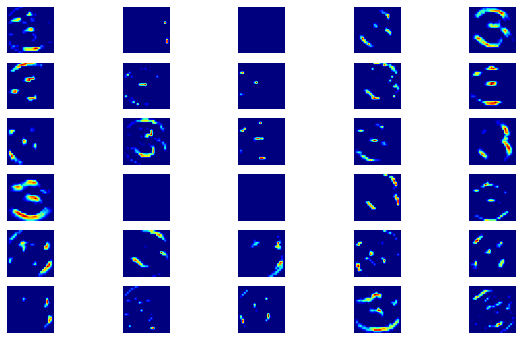

In [ ]:
# Uses keras model API
layer1 = Model(inputs=model.layers[0].input, outputs=model.layers[0].output)
layer2 = Model(inputs=model.layers[0].input, outputs=model.layers[2].output)
 
visual_layer1, visual_layer2 = layer1.predict(img), layer2.predict(img)
 
print(visual_layer1.shape)
print(visual_layer2.shape)
 
#layer 1
plt.figure(figsize=(10, 6))
for i in range(30):
    plt.subplot(6, 5, i+1)
    plt.imshow(visual_layer1[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')

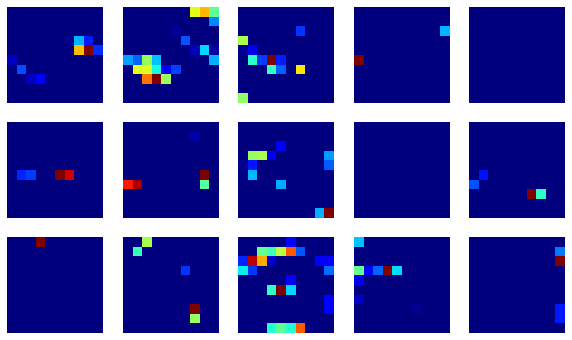

In [ ]:
#layer 2
plt.figure(figsize=(10, 6))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(visual_layer2[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')